# Video Game Sales Prediction

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv('vgsales.csv')

In [3]:
sale=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]

# Exploratory Data Analysis

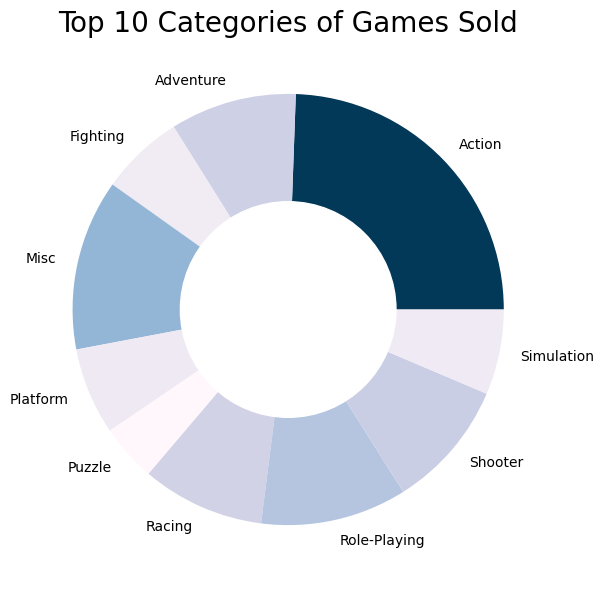

In [4]:
# Pie plot

import matplotlib as mpl
game = df.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin = min(game), vmax = max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels = game.index, colors = colours)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12)
plt.title("Top 10 Categories of Games Sold", fontsize = 20)
plt.show()

**Insights:**
- There are 10 categories in the game
- Action game sold highest in the data

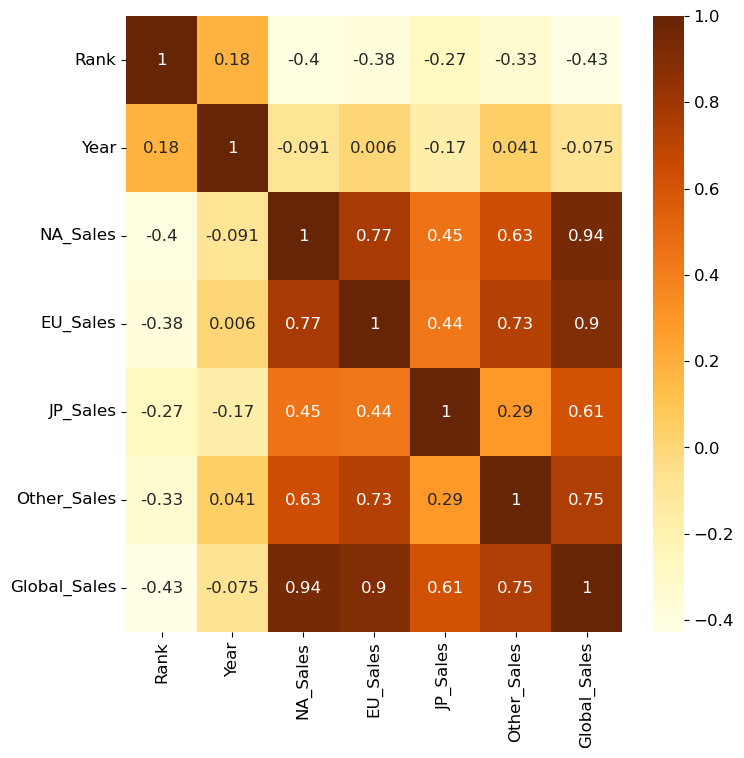

In [5]:
# Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap = "YlOrBr", annot = True)
plt.show()

**Insights:**
- There is high correlation between the NA_sales,Eu_Sales to the Global sales which clearly states the assumption for linear regression
- There is a linearity in the data 

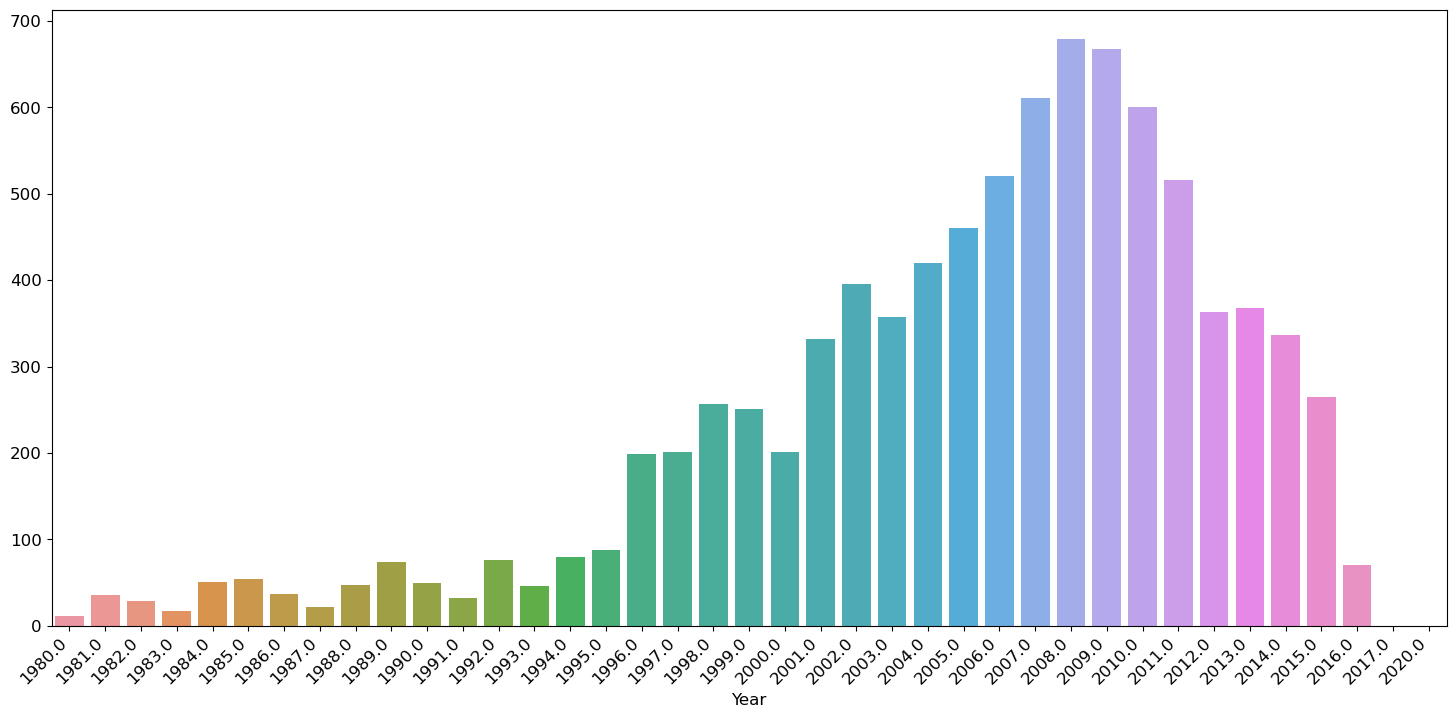

In [6]:
plt.figure(figsize=(18,8))
year=df.groupby("Year")["Global_Sales"].sum()
sns.barplot(year.index,year.values)
plt.xticks(rotation=45, ha='right')
plt.show()

**In `2007,2008,2009` there is huge sales in the global**

# Helper function to create boxplots,histograms

In [7]:
def histogram_boxplot(feature, figsize=(15,10), bins=None):
    f,(ax_box,ax_hist)=plt.subplots(nrows=2,sharex=True, gridspec_kw={'height_ratios':(.25,.75)},figsize=figsize)                                  
                                                                                                   
    sns.distplot(feature,kde=True,ax=ax_hist,bins=bins) 
    sns.boxplot(feature,ax=ax_box, color='Red')
    ax_hist.axvline(np.mean(feature),color='g',linestyle='-')
    ax_hist.axvline(np.median(feature),color='y',linestyle='--')
    plt.tight_layout()

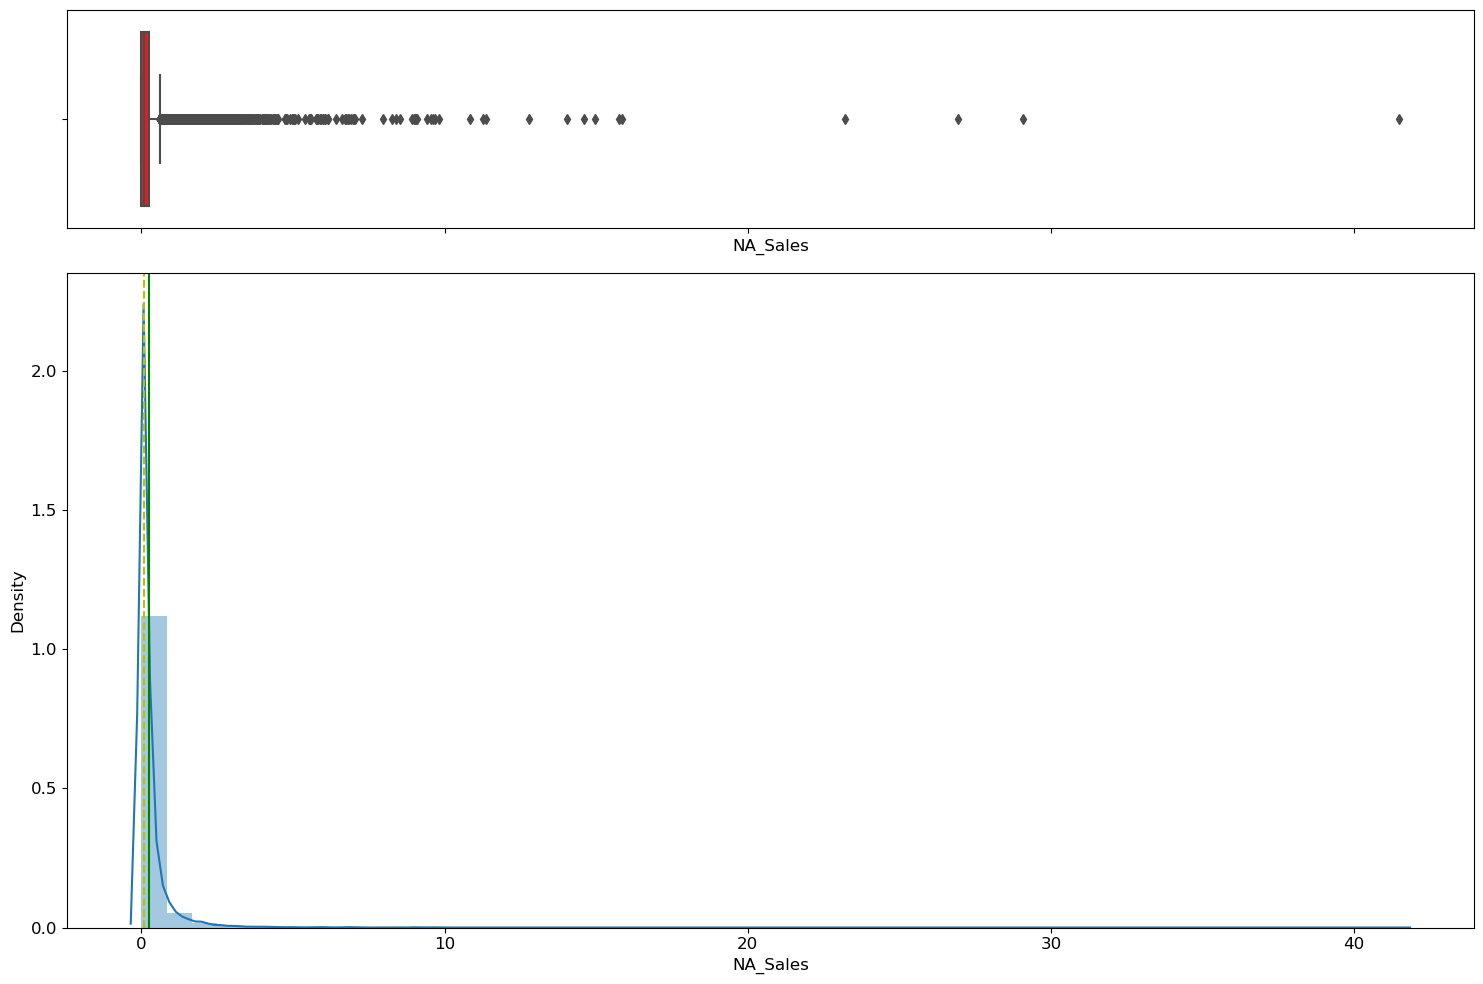

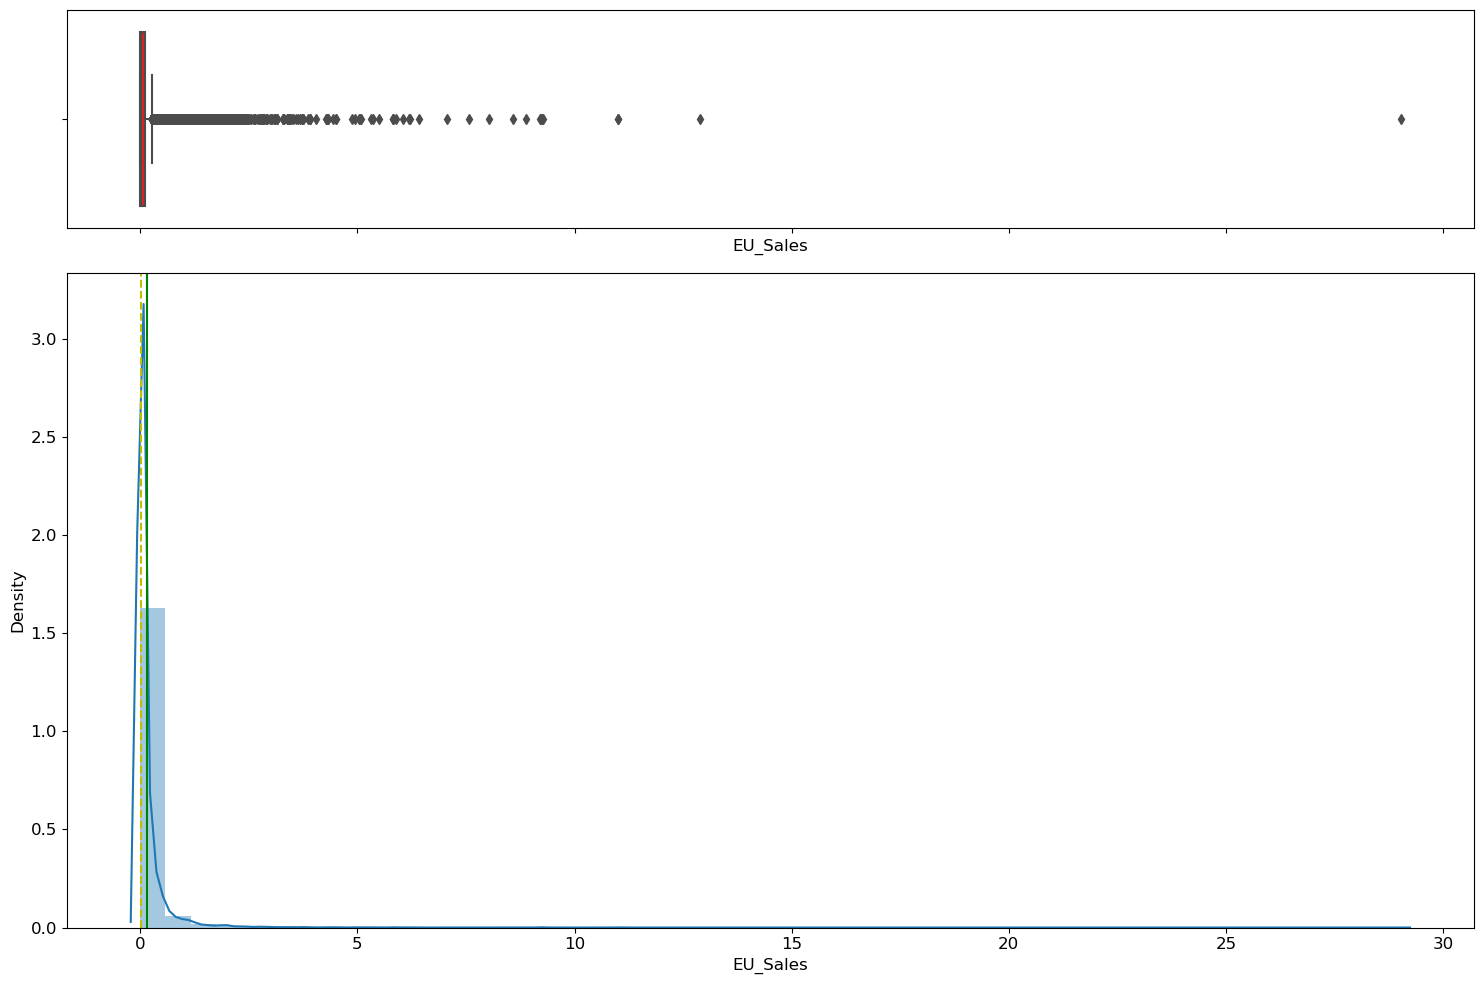

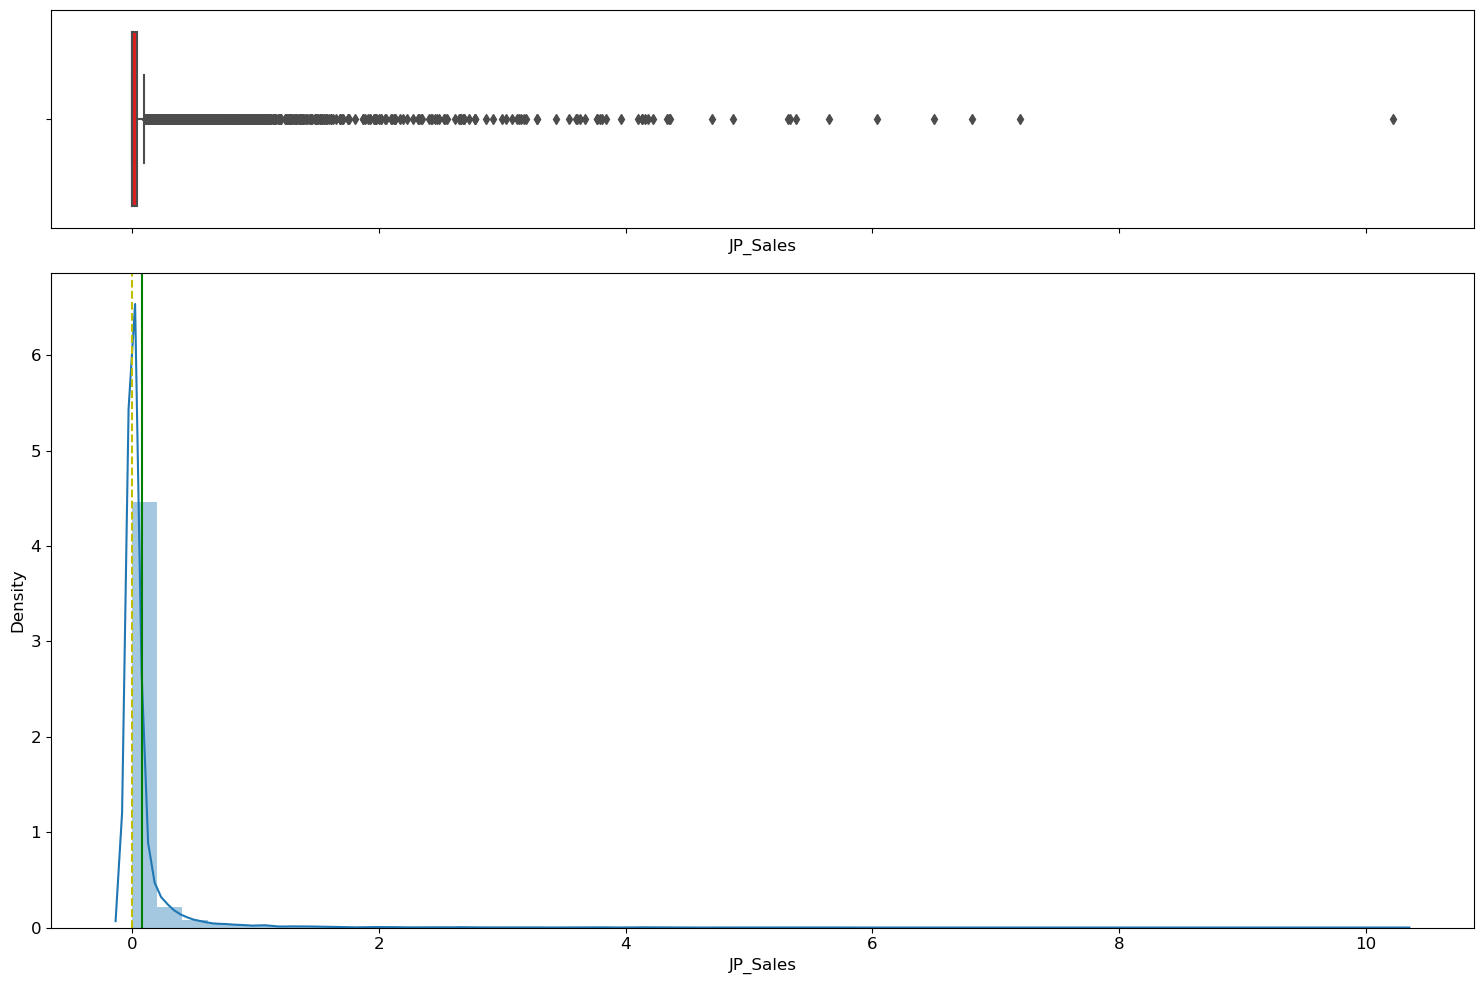

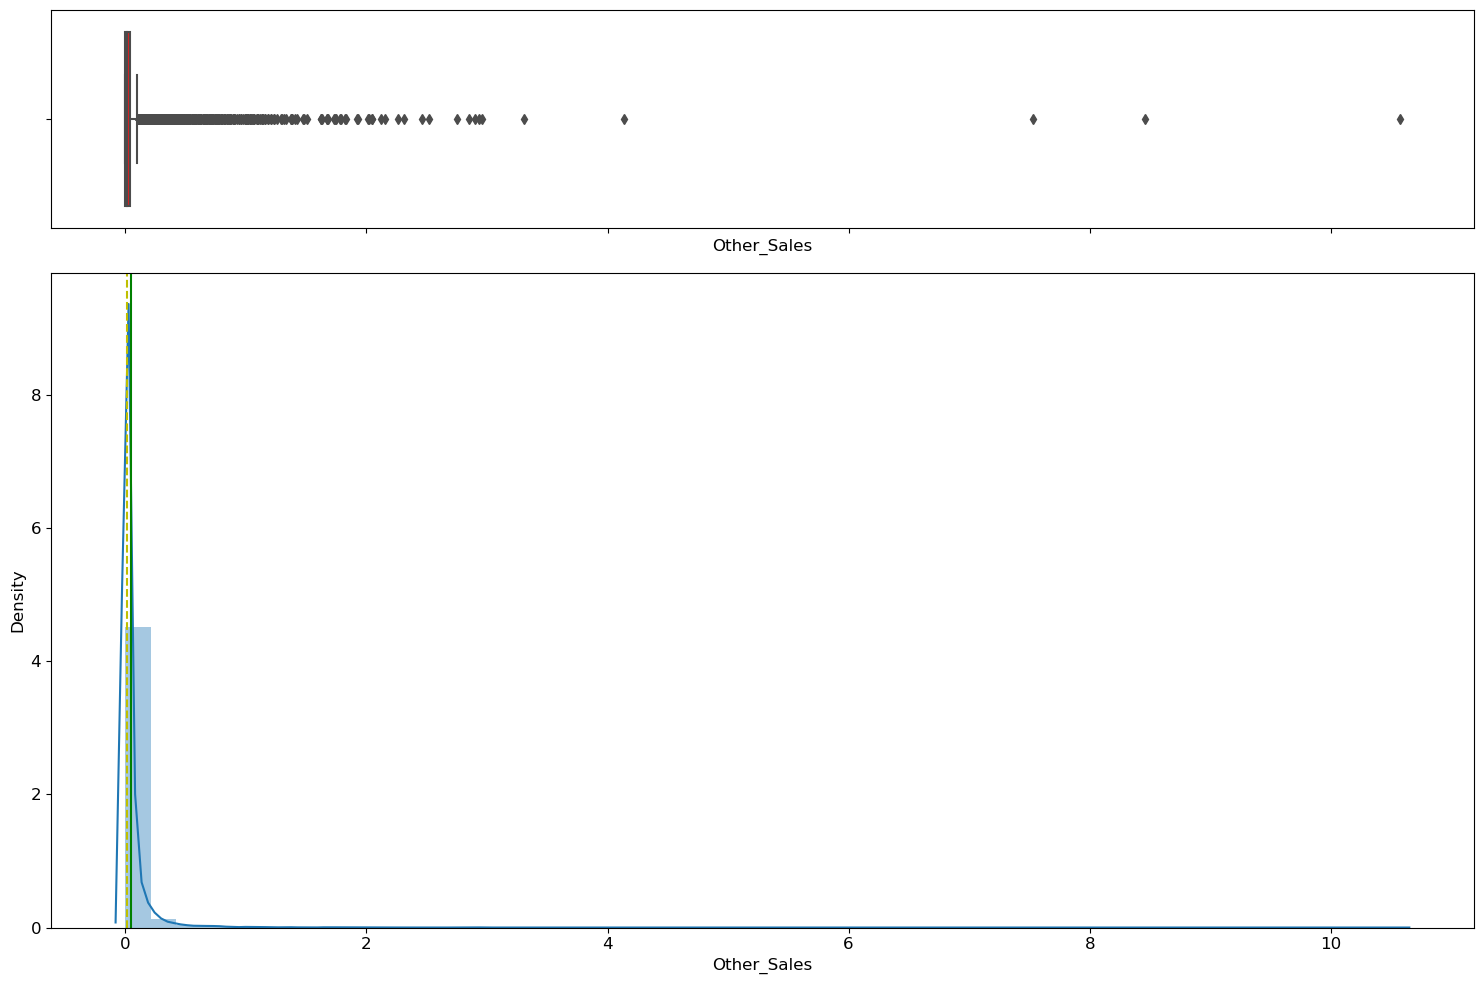

In [8]:
for i in sale:
    histogram_boxplot(df[i])

# Data Preparation for model building

In [9]:
df.shape

(16598, 11)

In [10]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [12]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [14]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [15]:
df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [16]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [17]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [18]:
# Removing null values
df = df.dropna()

In [19]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [20]:
x = df.drop(['Global_Sales'], axis = 1)
y = df['Global_Sales'] # target variable

In [21]:
# Converting categorical variables to numerical using one-hot encoding

#df = pd.get_dummies(df, columns=['Platform', 'Genre', 'Publisher'])

In [22]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Split the data into training and testing sets

In [23]:
cat_col=["Name","Platform","Genre","Publisher"]
numcol=["Rank","Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]

In [24]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
ohe=OneHotEncoder(handle_unknown='ignore')
x_tr=ohe.fit_transform(x_train[cat_col])

In [26]:
x_tr

<13032x10111 sparse matrix of type '<class 'numpy.float64'>'
	with 52128 stored elements in Compressed Sparse Row format>

In [27]:
x_te=ohe.transform(x_test[cat_col])

In [28]:
xtr_cat=pd.DataFrame(x_tr.todense(),columns=ohe.get_feature_names())

In [29]:
xte_cat=pd.DataFrame(x_te.todense(),columns=ohe.get_feature_names())

In [30]:
num_col_tr=x_train[numcol].reset_index()
num_col_te=x_test[numcol].reset_index()

In [31]:
x_train=pd.concat([num_col_tr,xtr_cat],axis=1)
x_test=pd.concat([num_col_te,xte_cat],axis=1)

In [32]:
x_train

,index,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,x0_'98 Koshien,x0_.hack//G.U. Vol.1//Rebirth,x0_.hack//G.U. Vol.2//Reminisce,...,x3_Zoo Games,x3_Zushi Games,x3_bitComposer Games,x3_dramatic create,x3_fonfun,x3_iWin,x3_id Software,x3_imageepoch Inc.,"x3_mixi, Inc",x3_responDESIGN
0,1688,1690,2007.0,0.45,0.47,0.00,0.28,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,661,663,2014.0,1.46,0.54,0.01,0.37,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3758,3760,2001.0,0.26,0.20,0.00,0.07,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12416,12418,2011.0,0.00,0.05,0.00,0.01,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7350,7352,2002.0,0.15,0.06,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13027,13655,13657,2011.0,0.00,0.00,0.04,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13028,5474,5476,2003.0,0.25,0.07,0.00,0.01,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13029,870,872,2006.0,1.09,0.65,0.02,0.20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13030,16087,16090,2008.0,0.00,0.00,0.01,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Build the Lasso regression model

In [34]:
# Build the Lasso regression model
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [35]:
# Evaluate the performance of the model
y_pred = lasso.predict(x_test)
y_pred1=lasso.predict(x_train)
mse=mean_squared_error(y_train, y_pred1)
mse1 = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_train, y_pred1)
r21 = r2_score(y_test, y_pred)
print('Train Mean Squared Error:', mse)
print('Train R-squared:', r2)
print("~"*100)
print('Test Mean Squared Error:', mse1)
print('Test R-squared:', r21)

Train Mean Squared Error: 0.14473406102896313
Train R-squared: 0.9276566376177792
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Test Mean Squared Error: 0.21408140297665756
Test R-squared: 0.9499572190654172


# Second approach using ordinal encoder

In [36]:
from sklearn.preprocessing import OrdinalEncoder

In [37]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
ol=OrdinalEncoder()
x_train[cat_col]=ol.fit_transform(x_train[cat_col])

In [39]:
x_test[cat_col]=ol.fit_transform(x_test[cat_col])

In [40]:
x_train

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1688,1690,9005.0,19.0,2007.0,2.0,444.0,0.45,0.47,0.00,0.28
661,663,5235.0,18.0,2014.0,10.0,450.0,1.46,0.54,0.01,0.37
3758,3760,8494.0,16.0,2001.0,8.0,323.0,0.26,0.20,0.00,0.07
12416,12418,5072.0,28.0,2011.0,6.0,79.0,0.00,0.05,0.00,0.01
7350,7352,6639.0,6.0,2002.0,8.0,442.0,0.15,0.06,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
13655,13657,5997.0,19.0,2011.0,7.0,336.0,0.00,0.00,0.04,0.00
5474,5476,1716.0,29.0,2003.0,8.0,131.0,0.25,0.07,0.00,0.01
870,872,8576.0,28.0,2006.0,8.0,479.0,1.09,0.65,0.02,0.20
16087,16090,4530.0,26.0,2008.0,10.0,449.0,0.00,0.00,0.01,0.00


In [41]:
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [42]:
# Evaluate the performance of the model
y_pred = lasso.predict(x_test)
y_pred1=lasso.predict(x_train)
mse=mean_squared_error(y_train, y_pred1)
mse1 = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_train, y_pred1)
r21 = r2_score(y_test, y_pred)
print('Train Mean Squared Error:', mse)
print('Train R-squared:', r2)
print("~"*100)
print('Test Mean Squared Error:', mse1)
print('Test R-squared:', r21)

Train Mean Squared Error: 0.14382032966400674
Train R-squared: 0.9281133538792113
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Test Mean Squared Error: 0.21349095307684107
Test R-squared: 0.9500952401853208


# Third approach using label encoder

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
lr=LabelEncoder()
for i in cat_col:
    x_train[i]=lr.fit_transform(x_train[i])
    x_test[i]=lr.fit_transform(x_test[i])

In [46]:
x_train

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1688,1690,9005,19,2007.0,2,444,0.45,0.47,0.00,0.28
661,663,5235,18,2014.0,10,450,1.46,0.54,0.01,0.37
3758,3760,8494,16,2001.0,8,323,0.26,0.20,0.00,0.07
12416,12418,5072,28,2011.0,6,79,0.00,0.05,0.00,0.01
7350,7352,6639,6,2002.0,8,442,0.15,0.06,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
13655,13657,5997,19,2011.0,7,336,0.00,0.00,0.04,0.00
5474,5476,1716,29,2003.0,8,131,0.25,0.07,0.00,0.01
870,872,8576,28,2006.0,8,479,1.09,0.65,0.02,0.20
16087,16090,4530,26,2008.0,10,449,0.00,0.00,0.01,0.00


In [47]:
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [48]:
# Evaluate the performance of the model
y_pred = lasso.predict(x_test)
y_pred1=lasso.predict(x_train)
mse=mean_squared_error(y_train, y_pred1)
mse1 = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_train, y_pred1)
r21 = r2_score(y_test, y_pred)
print('Train Mean Squared Error:', mse)
print('Train R-squared:', r2)
print("~"*100)
print('Test Mean Squared Error:', mse1)
print('Test R-squared:', r21)

Train Mean Squared Error: 0.14382032966400674
Train R-squared: 0.9281133538792113
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Test Mean Squared Error: 0.21349095307684107
Test R-squared: 0.9500952401853208


# Fourth approach using dummies and ordinal encoder

In [49]:
df[cat_col].nunique()

Name         11325
Platform        31
Genre           12
Publisher      576
dtype: int64

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
ol_col=['Name','Platform','Publisher']

In [52]:
x_train=pd.get_dummies(x_train, columns=['Genre'])
x_train[ol_col]=ol.fit_transform(x_train[ol_col])

In [53]:
x_test=pd.get_dummies(x_test, columns=['Genre'])
x_test[ol_col]=ol.fit_transform(x_test[ol_col])

In [54]:
x_train

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Genre_Action,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
1688,1690,9005.0,19.0,2007.0,444.0,0.45,0.47,0.00,0.28,0,...,1,0,0,0,0,0,0,0,0,0
661,663,5235.0,18.0,2014.0,450.0,1.46,0.54,0.01,0.37,0,...,0,0,0,0,0,0,0,0,1,0
3758,3760,8494.0,16.0,2001.0,323.0,0.26,0.20,0.00,0.07,0,...,0,0,0,0,0,0,1,0,0,0
12416,12418,5072.0,28.0,2011.0,79.0,0.00,0.05,0.00,0.01,0,...,0,0,0,0,1,0,0,0,0,0
7350,7352,6639.0,6.0,2002.0,442.0,0.15,0.06,0.00,0.00,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13655,13657,5997.0,19.0,2011.0,336.0,0.00,0.00,0.04,0.00,0,...,0,0,0,0,0,1,0,0,0,0
5474,5476,1716.0,29.0,2003.0,131.0,0.25,0.07,0.00,0.01,0,...,0,0,0,0,0,0,1,0,0,0
870,872,8576.0,28.0,2006.0,479.0,1.09,0.65,0.02,0.20,0,...,0,0,0,0,0,0,1,0,0,0
16087,16090,4530.0,26.0,2008.0,449.0,0.00,0.00,0.01,0.00,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [56]:
# Evaluate the performance of the model
y_pred = lasso.predict(x_test)
y_pred1=lasso.predict(x_train)
mse=mean_squared_error(y_train, y_pred1)
mse1 = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_train, y_pred1)
r21 = r2_score(y_test, y_pred)
print('Train Mean Squared Error:', mse)
print('Train R-squared:', r2)
print("~"*100)
print('Test Mean Squared Error:', mse1)
print('Test R-squared:', r21)

Train Mean Squared Error: 0.14382032966400674
Train R-squared: 0.9281133538792113
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Test Mean Squared Error: 0.21349095307684107
Test R-squared: 0.9500952401853208
